# Bivariate analysis with  
- Species vs Sex  
- Island vs Sex

In [1]:
import pandas as pd
import seaborn as sns
sns.set_style("dark")

In [2]:
from scipy.stats import chi2_contingency

In [3]:
penguins = sns.load_dataset("penguins")
sns.set_style("dark")

In [4]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# Sex vs species

I expect the ratio between the sexes to be at least roughly even. I would expect the correlation to be quite low, as I expect the ratio to be low everywhere.

In [5]:
table = penguins.groupby(['sex','species']).size().unstack('sex', fill_value=0)
table

sex,Female,Male
species,,
Adelie,73,73
Chinstrap,34,34
Gentoo,58,61


The ratios are pretty much even.

<AxesSubplot:xlabel='species'>

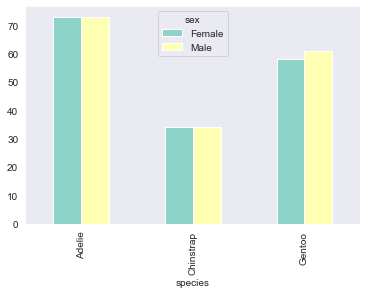

In [6]:
table.plot(kind='bar')

The same can be seen in the barplot.

In [7]:
chi2_contingency(table)

(0.04860717014078318,
 0.9759893689765846,
 2,
 array([[72.34234234, 73.65765766],
        [33.69369369, 34.30630631],
        [58.96396396, 60.03603604]]))

And as expected the chance that the two variables are correlated is pretty much 0

# Island vs Sex

I expect the ratio between the islands to be roughly even as well. I would expect the correlation to be quite low, as I expect the ratio to be low everywhere.

In [8]:
table2 = penguins.groupby(['sex','island']).size().unstack('island', fill_value=0)

<AxesSubplot:xlabel='sex'>

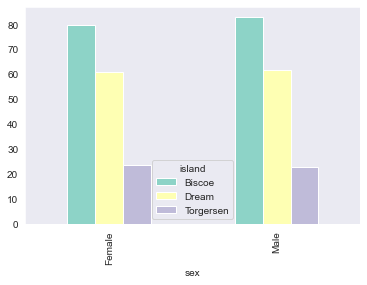

In [9]:
table2.plot(kind='bar')

In [10]:
chi2_contingency(table2)

(0.05759904881286206,
 0.971611229281065,
 2,
 array([[80.76576577, 60.94594595, 23.28828829],
        [82.23423423, 62.05405405, 23.71171171]]))